In [10]:
import numpy as np
import time
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


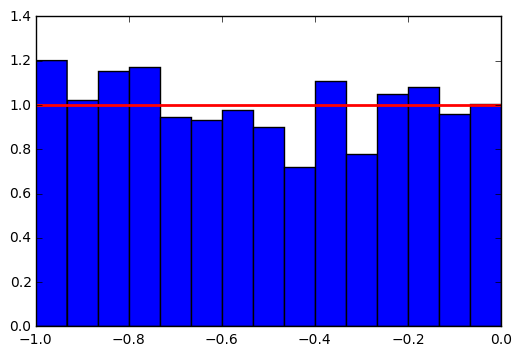

In [4]:
import matplotlib.pyplot as plt
s = np.random.uniform(-1,0,1000)
count, bins, ignored = plt.hist(s, 15, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [5]:
from markov import MarkovChain

K = 5 #number of states
u=np.random.rand(K) #initial distritbution
u/=np.sum(u) #normalize it
P = np.random.rand(K,K)
#print P
#P = np.array([[1.0,2.0,3.0], [2.0,3.0,4.0], [5.0,6.0,7.0]])
X=np.sum(P, axis=1)
P /= X[np.newaxis,:].T
#print P
print np.sum(P, axis=1)
assert np.sum(abs(np.sum(P, axis=1) - 1.0) < 1e-10) == K

m = MarkovChain(u, P)
#print m.psiRange
#print m.psi(0.0)

m.simulate(n=20, verbose=False)
#print np.searchsorted([1,2,3,4, 4, 4,5], 4, side='right')     

[ 1.  1.  1.  1.  1.]


['X0: 2',
 'X1: 2',
 'X2: 5',
 'X3: 1',
 'X4: 1',
 'X5: 1',
 'X6: 2',
 'X7: 5',
 'X8: 5',
 'X9: 3',
 'X10: 3',
 'X11: 5',
 'X12: 1',
 'X13: 1',
 'X14: 1',
 'X15: 4',
 'X16: 1',
 'X17: 3',
 'X18: 1',
 'X19: 1']

In [6]:
np.log(100)

4.6051701859880918

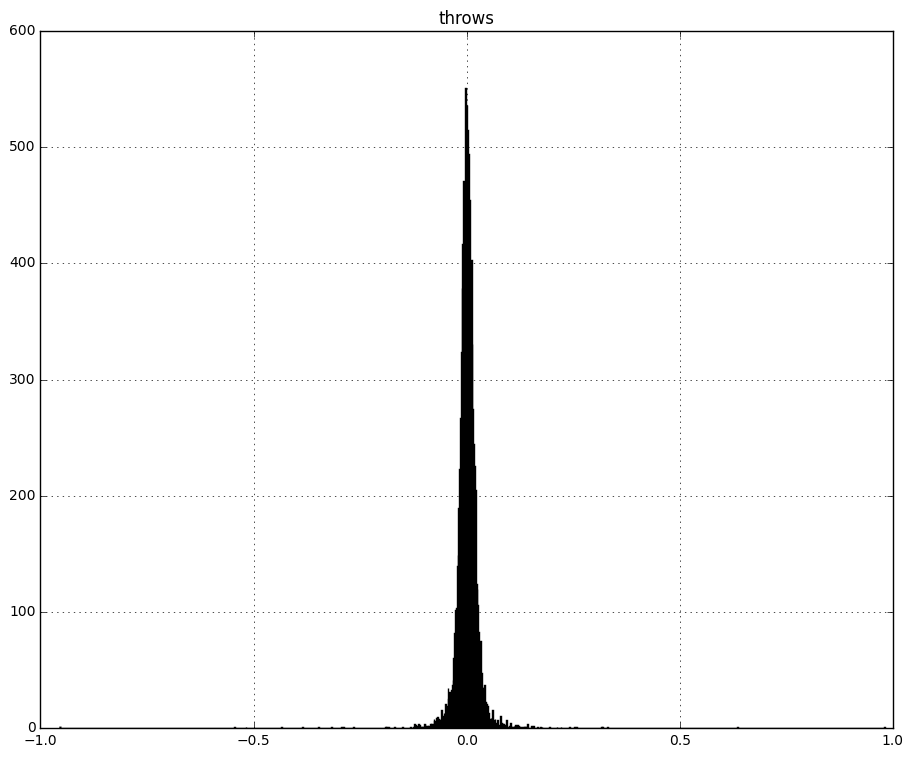

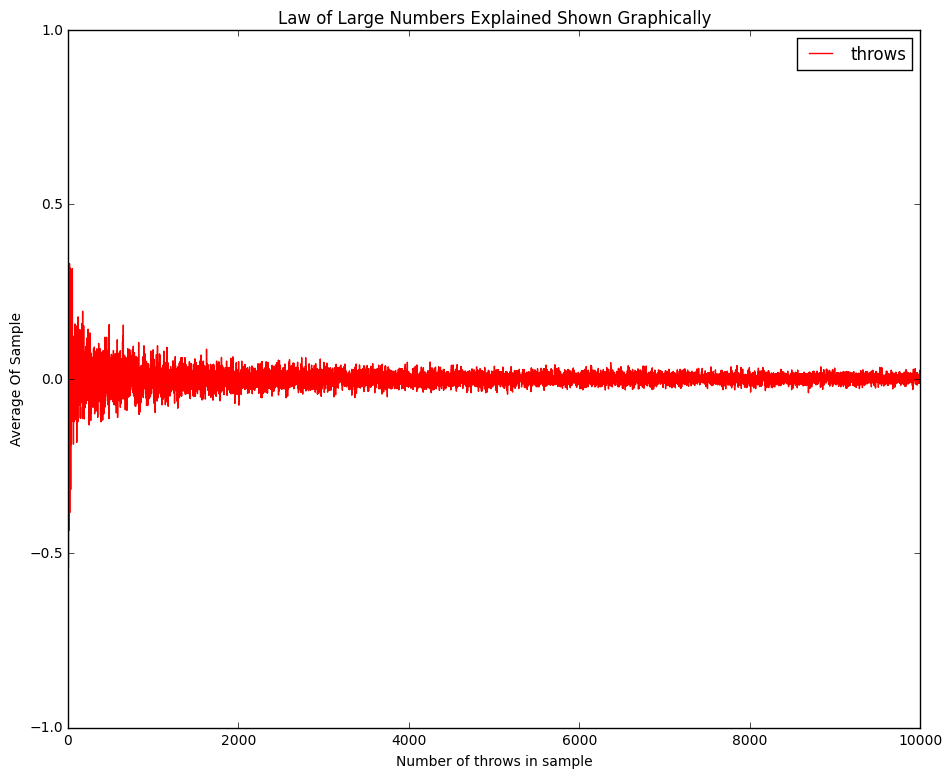

In [14]:
import pandas as pd
results = []
for num_throws in range(1, 10000):
    # throws = np.random.randint(low=1, high=7, size=num_throws)
    throws = np.random.randn(num_throws)
    mean_of_throws = throws.mean()
    results.append(mean_of_throws)

df = pd.DataFrame({'throws': results})

from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(11, 9)
df.hist(color='r',bins=1000)
df.plot(title='Law of Large Numbers Explained Shown Graphically', color='r')
plt.xlabel("Number of throws in sample")
plt.ylabel("Average Of Sample")
plt.show()

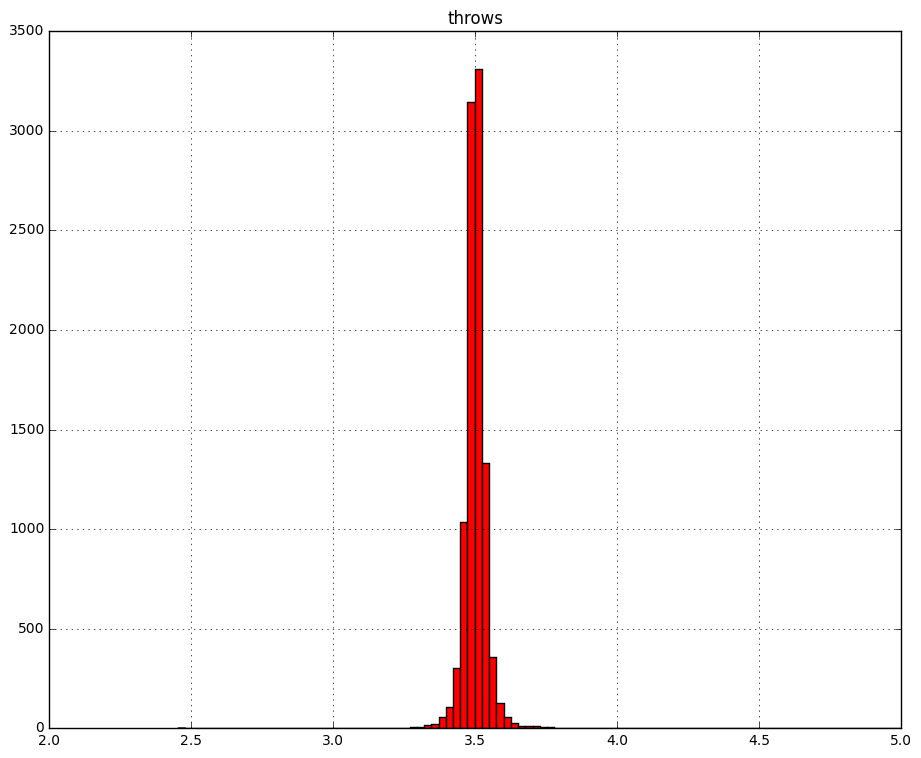

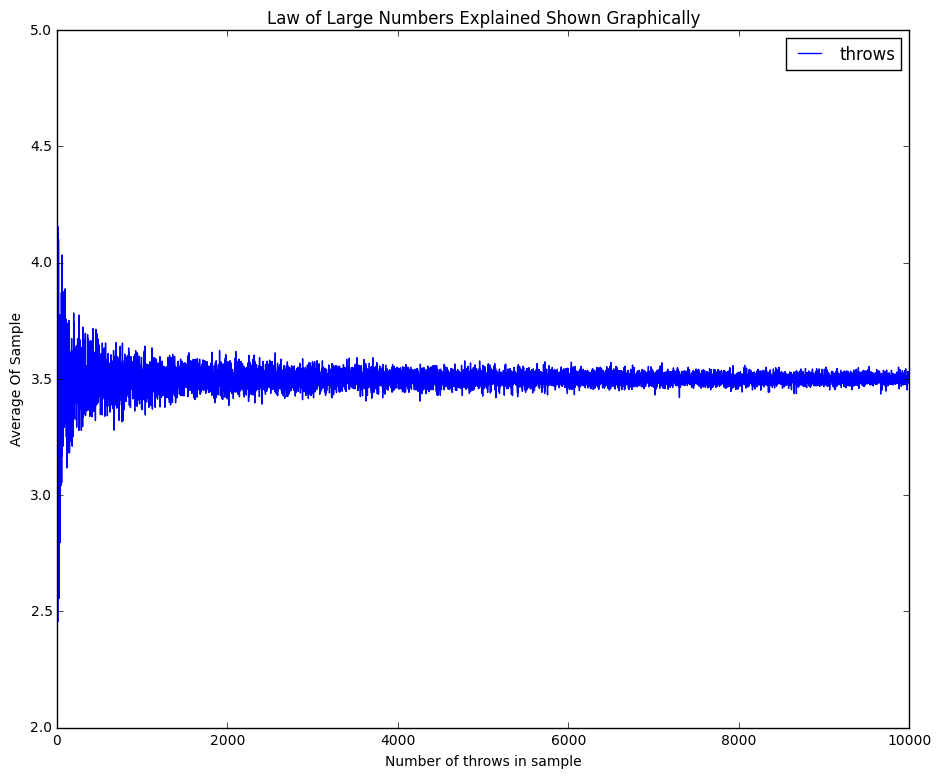

In [15]:
results = []
for num_throws in range(1, 10000):
    throws = np.random.randint(low=1, high=7, size=num_throws)
    #throws = np.random.randn(num_throws)
    mean_of_throws = throws.mean()
    results.append(mean_of_throws)

df = pd.DataFrame({'throws': results})
df.hist(color='r',bins=100)
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(11, 9)
df.plot(title='Law of Large Numbers Explained Shown Graphically', color='b')
plt.xlabel("Number of throws in sample")
plt.ylabel("Average Of Sample")
plt.show()

0 1
0 2
1 2
2 3
2 5
2 6
3 4
3 5
4 5
5 9
5 6
6 8
6 9
6 7
9 11
10 11
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Running time: 33.8510000706


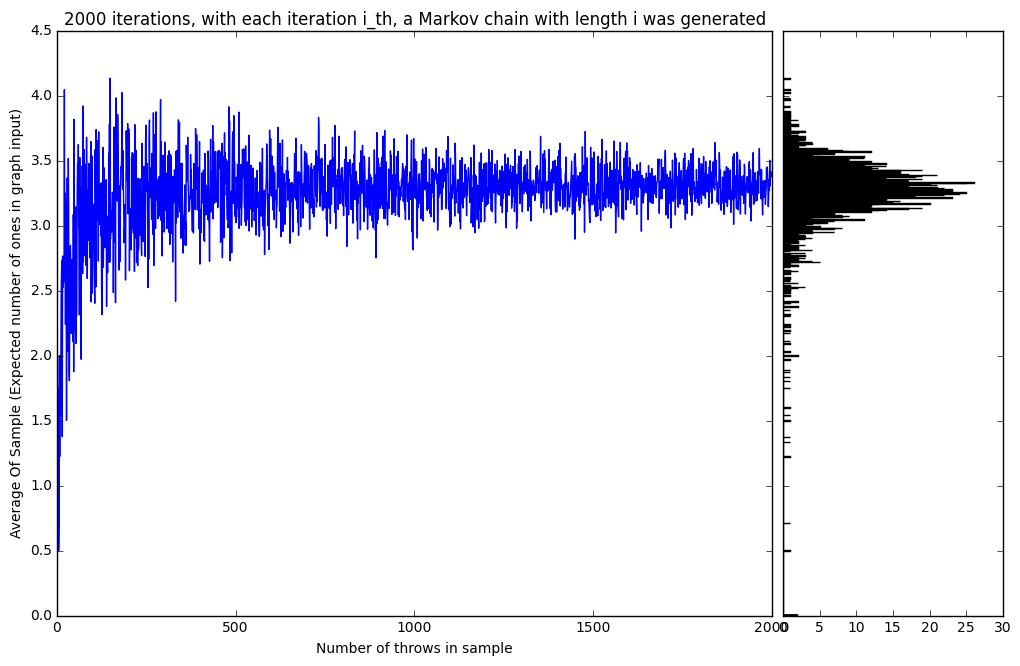

In [ ]:
import networkx as nx
import math
from matplotlib.ticker import NullFormatter
f=open('sample.txt')
G = nx.Graph()
for line in f:
    line=line.replace('\n', '')
    u,v=line.split()
    u=int(u)
    v=int(v)
    u-=1
    v-=1
    G.add_edge(u,v)
    
#########################################################
#Similation of HardCore model using Markov chain.
#Input: A file of edges G(V,E), nodeID must begin with 1.  no_simulations (e.g., number of loop. ) 
#Output: 
#In each loop, we will generate a feasible configuration (FC) of a graph as follows:
# 
#########################################################
'''
(1) Pick a vertex v \in V uniformly
(2) Toss a fair coin.
(3) If the coin comes up heads, and all neighbors of v take value of 0 in X_n, then let X_{n+1}(v)=1; otherwise let X_{n+1}=0
(4) For all vertices w (w \neq v) leave them unchanged.
Complexity: It should be O(deg(v)).
(1) + (2) => O(1)
(3) => O(deg(v))

'''
for e in G.edges():
    print e[0], e[1]
print G.nodes()
k = len(G.nodes()) #number of vertices.
dict_adj = {}
for n in G.nodes():
    dict_adj[n] = np.array(G.neighbors(n))
    #print n, ': ', G.neighbors(n)
#print dict_adj
#initialize state. all vertices have label 0.
list_avg_no_1=[]
tic=time.time()
for ii in xrange(2000):
    dict_init = {}
    #dict_steps = {}
    no_ones=0
    no_simulations = (ii+1)
    #for i in xrange(1,k+1):
    #    dict_init[i] = 0
    #dict_steps[0] = dict_init
    init_array=np.zeros(k)
    pre = init_array
    for i in xrange(1, no_simulations+1):
        #Copy previous step
        #pre = dict_steps[i-1]
        curr_labels = pre
        #Choose a vertex uniformly in range [0, k]
        nodeId=np.random.randint(low=0, high=k) #
        coin=np.random.randint(low=0, high=2) #[0 or 1]
        #From selected number, we should immediately know what vertex is selected.
        #In text book MCMC of Applied Stochastic Process page 48. We divide [0-1] in 2k equal subintervals (e.g., length each
        #subinterval is 1/(2k), representing the choises 
        #(v_1, heads), (v_1, tails), (v_2, heads), (v_2_tails)...(v_k, heads), (v_k, tails))
        if(coin == 1):
            #print nodeId
            #neighbors=G.neighbors(nodeId)
            s = np.sum(curr_labels[dict_adj[nodeId]])
            
            if s!=0:
                curr_labels[nodeId] = 0
            else:
                curr_labels[nodeId] = 1
        else:
            curr_labels[nodeId] = 0
        #dict_steps[i] = dict_this_step
        pre = curr_labels
        #Testing
        #for e in G.edges():
        #    assert not(abs(curr_labels[e[0]]- 1) < 1e-10 and abs(curr_labels[e[1]] - 1) < 1e-10)
        no_ones += np.sum(curr_labels)
    
    list_avg_no_1.append(no_ones / float(no_simulations))
toc=time.time()
print 'Running time:', (toc-tic)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.01

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
axScatter = plt.axes(rect_scatter)

axHisty = plt.axes(rect_histy) #histogram along y-axis
axHisty.hist(list_avg_no_1, bins=1000, orientation='horizontal')

df = pd.DataFrame({'throws': list_avg_no_1})
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
#figsize(11, 9)
axScatter.plot(np.arange(len(list_avg_no_1)), list_avg_no_1, 'b-')
#df.plot(ax=axScatter,title='%s iterations, with each iteration i_th, a Markov chain with length i was generated' % len(list_avg_no_1), color='b')
axScatter.set_xlabel("Number of throws in sample")
axScatter.set_ylabel("Average Of Sample (Expected number of ones in graph input)")
#No label for x-axis of histogram
nullfmt = NullFormatter()
axHisty.yaxis.set_major_formatter(nullfmt)
axScatter.set_title('%s iterations, with each iteration i_th, a Markov chain with length i was generated' % len(list_avg_no_1))
#plt.xlabel("Number of throws in sample")
#plt.ylabel("Average Of Sample (Expected number of ones in graph input)")
plt.show()
#We can see the convergence of Markov chain. The expected number of ones in graph G(V, E) is about 3.3. 
#This number is quite make sense. The large value of no_simulation, the more accuracy of expected number of ones in a graph. 

0 1
0 3
1 2
1 4
2 5
3 4
3 6
4 5
4 7
5 8
6 7
7 8
[0, 1, 2, 3, 4, 5, 6, 7, 8]
{0: array([1, 3]), 1: array([0, 2, 4]), 2: array([1, 5]), 3: array([0, 4, 6]), 4: array([1, 3, 5, 7]), 5: array([8, 2, 4]), 6: array([3, 7]), 7: array([8, 4, 6]), 8: array([5, 7])}
Running time: 31.2029998302


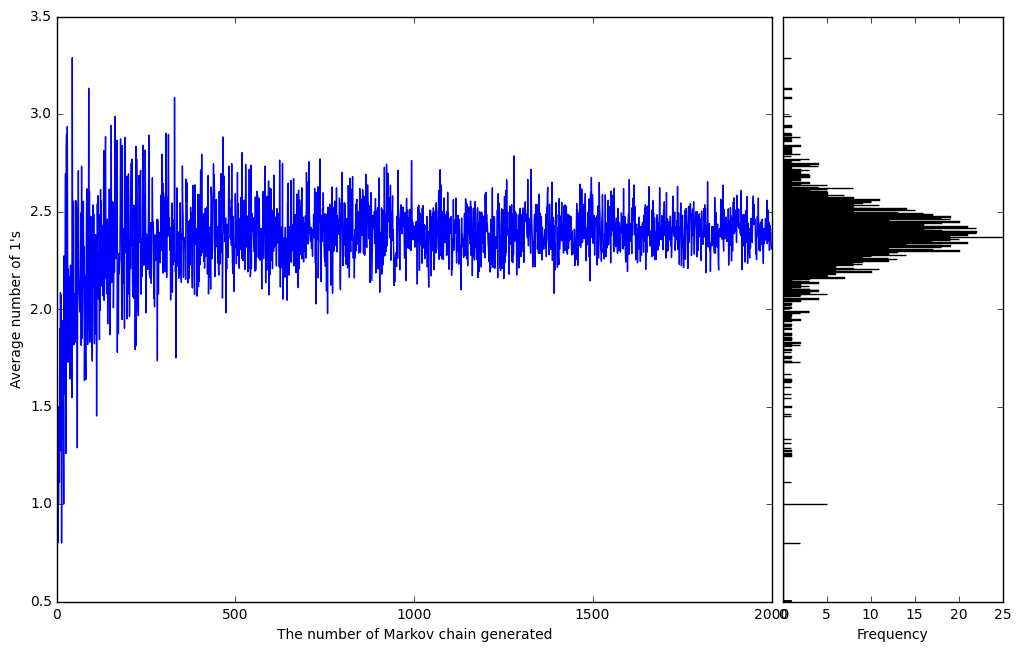

In [99]:
import networkx as nx
import math
from matplotlib.ticker import NullFormatter
f=open('chess_graph.txt')
G = nx.Graph()
for line in f:
    line=line.replace('\n', '')
    u,v=line.split()
    u=int(u)
    v=int(v)
    u-=1
    v-=1
    G.add_edge(u,v)
    
#########################################################
#Similation of HardCore model using Markov chain.
#Input: A file of edges G(V,E), nodeID must begin with 1.  no_simulations (e.g., number of loop. ) 
#Output: 
#In each loop, we will generate a feasible configuration (FC) of a graph as follows:
# 
#########################################################
'''
(1) Pick a vertex v \in V uniformly
(2) Toss a fair coin.
(3) If the coin comes up heads, and all neighbors of v take value of 0 in X_n, then let X_{n+1}(v)=1; otherwise let X_{n+1}=0
(4) For all vertices w (w \neq v) leave them unchanged.
Complexity: It should be O(deg(v)).
(1) + (2) => O(1)
(3) => O(deg(v))

'''
for e in G.edges():
    print e[0], e[1]
print G.nodes()
k = len(G.nodes()) #number of vertices.
dict_adj = {}
for n in G.nodes():
    dict_adj[n] = np.array(G.neighbors(n))
    #print n, ': ', G.neighbors(n)
print dict_adj
#initialize state. all vertices have label 0.
list_avg_no_1=[]
tic=time.time()
for ii in xrange(2000):
    dict_init = {}
    #dict_steps = {}
    no_ones=0
    no_simulations = (ii+1)
    #for i in xrange(1,k+1):
    #    dict_init[i] = 0
    #dict_steps[0] = dict_init
    init_array=np.zeros(k)
    pre = init_array
    for i in xrange(1, no_simulations+1):
        #Copy previous step
        #pre = dict_steps[i-1]
        curr_labels = pre
        #Choose a vertex uniformly in range [0, k]
        nodeId=np.random.randint(low=0, high=k) #
        coin=np.random.randint(low=0, high=2) #[0 or 1]
        #From selected number, we should immediately know what vertex is selected.
        #In text book MCMC of Applied Stochastic Process page 48. We divide [0-1] in 2k equal subintervals (e.g., length each
        #subinterval is 1/(2k), representing the choises 
        #(v_1, heads), (v_1, tails), (v_2, heads), (v_2_tails)...(v_k, heads), (v_k, tails))
        if(coin == 1):
            #print nodeId
            #neighbors=G.neighbors(nodeId)
            s = np.sum(curr_labels[dict_adj[nodeId]])
            
            if s!=0:
                curr_labels[nodeId] = 0
            else:
                curr_labels[nodeId] = 1
        else:
            curr_labels[nodeId] = 0
        #dict_steps[i] = dict_this_step
        pre = curr_labels
        #Testing
        #for e in G.edges():
        #    assert not(abs(curr_labels[e[0]]- 1) < 1e-10 and abs(curr_labels[e[1]] - 1) < 1e-10)
        no_ones += np.sum(curr_labels)
    
    list_avg_no_1.append(no_ones / float(no_simulations))
toc=time.time()
print 'Running time:', (toc-tic)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.01

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
axScatter = plt.axes(rect_scatter)

axHisty = plt.axes(rect_histy) #histogram along y-axis
axHisty.hist(list_avg_no_1, bins=1000, orientation='horizontal')

df = pd.DataFrame({'throws': list_avg_no_1})
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
#figsize(11, 9)
axScatter.plot(np.arange(len(list_avg_no_1)), list_avg_no_1, 'b-')
#df.plot(ax=axScatter,title='%s iterations, with each iteration i_th, a Markov chain with length i was generated' % len(list_avg_no_1), color='b')
axScatter.set_xlabel("The number of Markov chain generated")
axScatter.set_ylabel("Average number of 1's")
axHisty.set_xlabel("Frequency")
#No label for x-axis of histogram
nullfmt = NullFormatter()
axHisty.yaxis.set_major_formatter(nullfmt)
#axScatter.set_title('%s iterations, with each iteration i_th, a Markov chain with length i was generated' % len(list_avg_no_1))
#plt.xlabel("Number of throws in sample")
#plt.ylabel("Average Of Sample (Expected number of ones in graph input)")
plt.show()
#We can see the convergence of Markov chain. The expected number of ones in graph G(V, E) is about 3.3. 
#This number is quite make sense. The large value of no_simulation, the more accuracy of expected number of ones in a graph. 

In [ ]:
import networkx as nx
import math
from matplotlib.ticker import NullFormatter
f=open('chess_graph_16.txt')
G = nx.Graph()
for line in f:
    line=line.replace('\n', '')
    u,v=line.split()
    u=int(u)
    v=int(v)
    u-=1
    v-=1
    G.add_edge(u,v)


for e in G.edges():
    print e[0], e[1]
print G.nodes()
k = len(G.nodes()) #number of vertices.
dict_adj = {}
d = 0
for n in G.nodes():
    dict_adj[n] = np.array(G.neighbors(n))
    d = max(len(dict_adj[n]), d)
S = np.arange(1, 2*d*d+2) #from Set of colors 1 -> 2d^2+1

list_avg_no_1=[]
list_avg_no_2=[]
list_avg_no_3=[]
tic=time.time()
for ii in xrange(200):
    dict_init = {}
    
    no_ones=0 #Number of ones.
    no_twos=0 #Number of twos
    no_threes=0 #Number of threes
    no_simulations = (ii+1)
    assert len(S) >= k, 'This code is only correct when number of colors is larger than the number of vertices'
    '''
    To save time for finding a valid color assignments to vertices of graph as a starting step of MCMC, I just
    assign each vertices a unique color. This way, of course, is only correct when number of colors is >= the number of vertices. 
    '''
    init_array=np.arange(1, k+1)
    assert type(init_array[0]) == np.int32, 'Type of element in this array: %s' % (type(init_array[0]))
    pre = init_array
    for i in xrange(1, no_simulations+1):
        #Copy previous step
        #pre = dict_steps[i-1]
        curr_labels = pre
        
        #Choose a vertex based on Systematic Sweep Gibbs sampler
        if i%k == 0:
            nodeId = k #it's always vertices k at the end of each loop
            nodeId -= 1
        else:
            nodeId = i%k
            nodeId -= 1
        assert nodeId <= k-1 and nodeId >= 0, 'Current: %s' % nodeId
        #shuffle set of color S into new permutation using https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html
        # http://www.programming-algorithms.net/article/43676/Fisher-Yates-shuffle
        np.random.shuffle(S)
        neighbors = dict_adj[nodeId]
        '''Get labels of neighbors of @nodeId'''
        local_colors = curr_labels[neighbors]
        
        chooseColor = -1
        '''Too inefficient'''
        for e in S: 
            if e not in local_colors:
                chooseColor = e
                break
        if chooseColor != -1:
            curr_labels[nodeId] = chooseColor
        
        pre = curr_labels
        #Testing
        for e in G.edges():
            u,v = e
            assert not(abs(curr_labels[u]) < 1e-10 and abs(curr_labels[v]) < 1e-10)
        
        for e in curr_labels:
            if e == 1:
                no_ones+=1
            if e == 2:
                no_twos+=1
            if e==3:
                no_threes+=1
                    
    list_avg_no_1.append(no_ones / float(no_simulations))
    list_avg_no_2.append(no_twos / float(no_simulations))
    list_avg_no_3.append(no_threes / float(no_simulations))
toc=time.time()
print 'Running time:', (toc-tic)


left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.01

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
axScatter = plt.axes(rect_scatter)

axHisty = plt.axes(rect_histy) #histogram along y-axis
axHisty.hist(list_avg_no_1, bins=1000, orientation='horizontal')

df = pd.DataFrame({'throws': list_avg_no_1})
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
#figsize(11, 9)
axScatter.plot(np.arange(len(list_avg_no_1)), list_avg_no_1, 'b-')
#df.plot(ax=axScatter,title='%s iterations, with each iteration i_th, a Markov chain with length i was generated' % len(list_avg_no_1), color='b')
axScatter.set_xlabel("Number of throws in sample")
axScatter.set_ylabel("Average Of Sample (Expected number of ones in graph input)")
#No label for x-axis of histogram
nullfmt = NullFormatter()
axHisty.yaxis.set_major_formatter(nullfmt)
axScatter.set_title('%s iterations, with each iteration i_th, a Markov chain with length i was generated' % len(list_avg_no_1))
#plt.xlabel("Number of throws in sample")
#plt.ylabel("Average Of Sample (Expected number of ones in graph input)")
plt.show()


0 1
0 4
1 2
1 5
2 3
2 6
3 7
4 8
4 5
5 6
5 9
6 10
6 7
7 11
8 9
8 12
9 10
9 13
10 11
10 14
11 15
12 13
13 14
14 15
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Running time: 60.6150000095


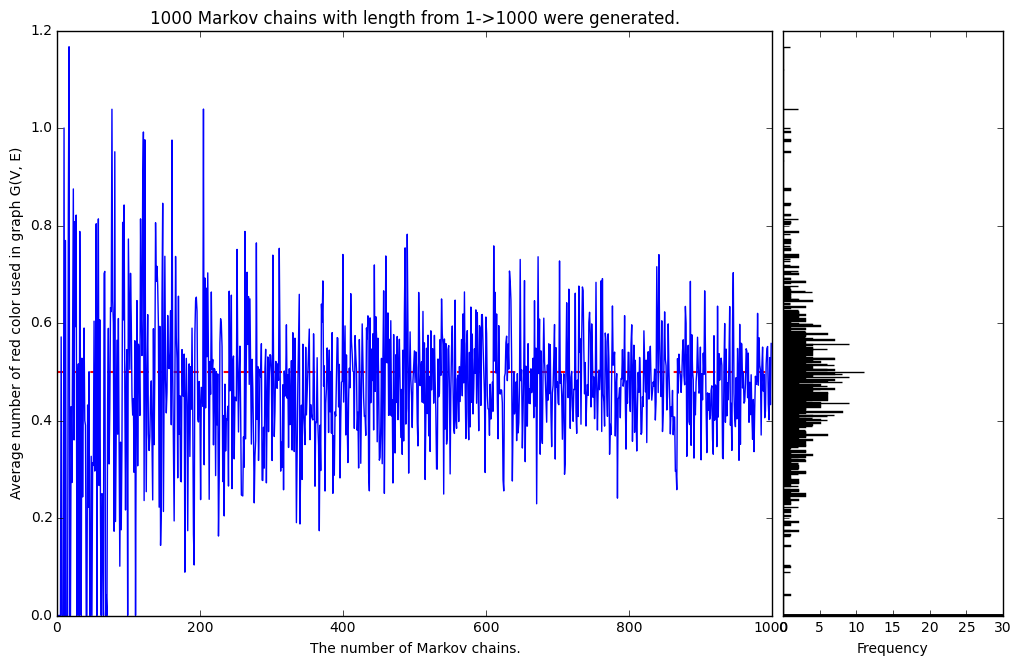

In [14]:
import networkx as nx
import math
from matplotlib.ticker import NullFormatter
f=open('chess_graph_16.txt')
G = nx.Graph()
for line in f:
    line=line.replace('\n', '')
    u,v=line.split()
    u=int(u)
    v=int(v)
    u-=1
    v-=1
    G.add_edge(u,v)


#for e in G.edges():
#    print e[0], e[1]
print G.nodes()
k = len(G.nodes()) #number of vertices.
dict_adj = {}
d = 0
for n in G.nodes():
    dict_adj[n] = np.array(G.neighbors(n))
    d = max(len(dict_adj[n]), d)
S = np.arange(1, 2*d*d+2) #from Set of colors 1 -> 2d^2+1

list_avg_no_1=[]
list_avg_no_2=[]
list_avg_no_3=[]
tic=time.time()
number_markov_chain_used=1000
for ii in xrange(number_markov_chain_used):
    dict_init = {}
    
    no_ones=0 #Number of ones.
    no_twos=0 #Number of twos
    no_threes=0 #Number of threes
    no_simulations = (ii+1)
    assert len(S) >= k, 'This code is only correct when number of colors is larger than the number of vertices'
    '''
    To save time for finding a valid color assignments to vertices of graph as a starting step of MCMC, I just
    assign each vertices a unique color. This way, of course, is only correct when number of colors is >= the number of vertices. 
    '''
    init_array=np.arange(1, k+1)
    assert type(init_array[0]) == np.int32, 'Type of element in this array: %s' % (type(init_array[0]))
    pre = init_array
    for i in xrange(1, no_simulations+1):
        #Copy previous step
        #pre = dict_steps[i-1]
        curr_labels = pre
        
        #Choose a vertex based on Systematic Sweep Gibbs sampler
        if i%k == 0:
            nodeId = k #it's always vertices k at the end of each loop
            nodeId -= 1
        else:
            nodeId = i%k
            nodeId -= 1
        assert nodeId <= k-1 and nodeId >= 0, 'Current: %s' % nodeId
        #shuffle set of color S into new permutation using https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html
        # http://www.programming-algorithms.net/article/43676/Fisher-Yates-shuffle
        np.random.shuffle(S)
        neighbors = dict_adj[nodeId]
        '''Get labels of neighbors of @nodeId'''
        local_colors = curr_labels[neighbors]
        
        chooseColor = -1
        '''Too inefficient'''
        for e in S: 
            if e not in local_colors:
                chooseColor = e
                break
        if chooseColor != -1:
            curr_labels[nodeId] = chooseColor
        
        pre = curr_labels
        #Testing
        for e in G.edges():
            u,v = e
            assert not(abs(curr_labels[u]) < 1e-10 and abs(curr_labels[v]) < 1e-10)
        
        for e in curr_labels:
            if e == 1:
                no_ones+=1
            if e == 2:
                no_twos+=1
            if e==3:
                no_threes+=1
                    
    list_avg_no_1.append(no_ones / float(no_simulations))
    list_avg_no_2.append(no_twos / float(no_simulations))
    list_avg_no_3.append(no_threes / float(no_simulations))
toc=time.time()
print 'Running time:', (toc-tic)


left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.01

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
axScatter = plt.axes(rect_scatter)

axHisty = plt.axes(rect_histy) #histogram along y-axis
axHisty.hist(list_avg_no_1, bins=1000, orientation='horizontal')
axHisty.set_xlabel("Frequency")
axScatter.axhline(y=0.5,xmin=0,xmax=1000,c="r",linewidth=1.5,zorder=0, linestyle='--')

df = pd.DataFrame({'throws': list_avg_no_1})
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
#figsize(11, 9)
axScatter.plot(np.arange(len(list_avg_no_1)), list_avg_no_1, 'b-')
#df.plot(ax=axScatter,title='%s iterations, with each iteration i_th, a Markov chain with length i was generated' % len(list_avg_no_1), color='b')
axScatter.set_xlabel("The number of Markov chains.")
axScatter.set_ylabel("Average number of red color used in graph G(V, E)")
#No label for x-axis of histogram
nullfmt = NullFormatter()
axHisty.yaxis.set_major_formatter(nullfmt)
axScatter.set_title('%s Markov chains with length from 1->%s were generated.' % (number_markov_chain_used, number_markov_chain_used))
#plt.xlabel("Number of throws in sample")
#plt.ylabel("Average Of Sample (Expected number of ones in graph input)")
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Running time: 0.830999851227


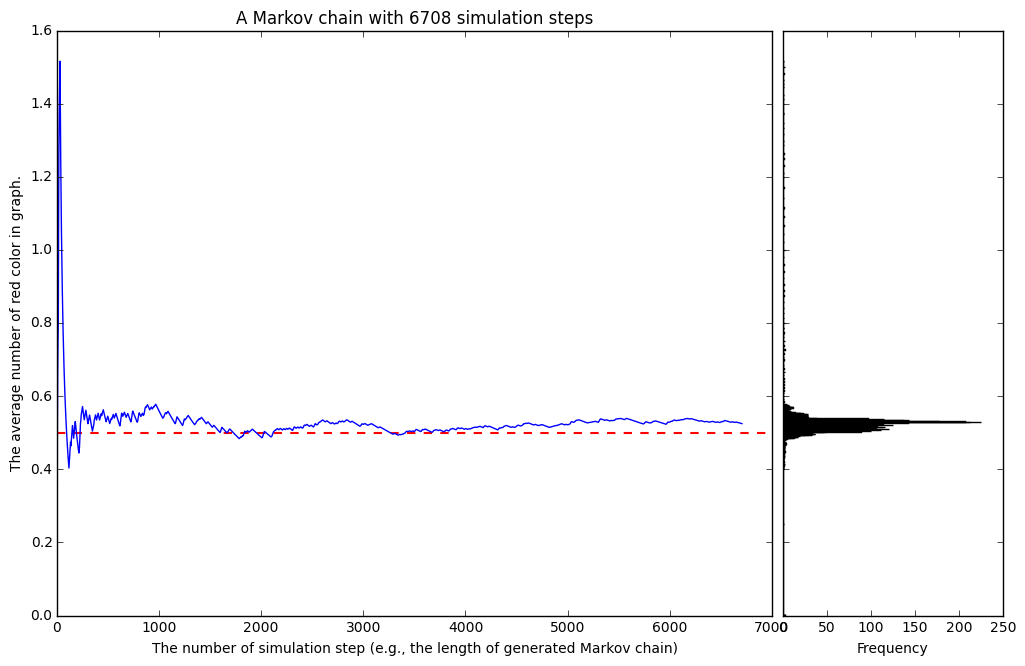

In [12]:
import networkx as nx
import math
from matplotlib.ticker import NullFormatter
f=open('chess_graph_16.txt')
G = nx.Graph()
for line in f:
    line=line.replace('\n', '')
    u,v=line.split()
    u=int(u)
    v=int(v)
    u-=1
    v-=1
    G.add_edge(u,v)

print G.nodes()
k = len(G.nodes()) #number of vertices.
dict_adj = {}
d = 0
for n in G.nodes():
    dict_adj[n] = np.array(G.neighbors(n))
    d = max(len(dict_adj[n]), d)
S = np.arange(1, 2*d*d+2) #from Set of colors 1 -> 2d^2+1

list_avg_no_1=[]
list_avg_no_2=[]
list_avg_no_3=[]
tic=time.time()

dict_init = {}
epsilon=1e-5
no_ones=0 #Number of ones.
no_twos=0 #Number of twos
no_threes=0 #Number of threes
no_simulations = int(k*( (math.log(k)+math.log(1.0 / epsilon)-math.log(d)) / (math.log(len(S) / (2.0*d*d))) )) +1
assert len(S) >= k, 'This code is only correct when number of colors is larger than the number of vertices'
'''
To save time for finding a valid color assignments to vertices of graph as a starting step of MCMC, I just
assign each vertices a unique color. This way, of course, is only correct when number of colors is >= the number of vertices. 
'''
init_array=np.arange(1, k+1)
assert type(init_array[0]) == np.int32, 'Type of element in this array: %s' % (type(init_array[0]))
pre = init_array
for i in xrange(1, no_simulations+1):
    #Copy previous step
    #pre = dict_steps[i-1]
    curr_labels = pre

    #Choose a vertex based on Systematic Sweep Gibbs sampler
    if i%k == 0:
        nodeId = k #it's always vertices k at the end of each loop
        nodeId -= 1
    else:
        nodeId = i%k
        nodeId -= 1
    assert nodeId <= k-1 and nodeId >= 0, 'Current: %s' % nodeId
    #shuffle set of color S into new permutation using https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html
    # http://www.programming-algorithms.net/article/43676/Fisher-Yates-shuffle
    np.random.shuffle(S)
    neighbors = dict_adj[nodeId]
    '''Get labels of neighbors of @nodeId'''
    local_colors = curr_labels[neighbors]

    chooseColor = -1
    '''Too inefficient'''
    for e in S: 
        if e not in local_colors:
            chooseColor = e
            break
    if chooseColor != -1:
        curr_labels[nodeId] = chooseColor

    pre = curr_labels
    #Testing
    for e in G.edges():
        u,v = e
        assert not(abs(curr_labels[u]) < 1e-10 and abs(curr_labels[v]) < 1e-10)

    for e in curr_labels:
        if e == 1:
            no_ones+=1
        if e == 2:
            no_twos+=1
        if e==3:
            no_threes+=1

    list_avg_no_1.append(no_ones / float(i))
    list_avg_no_2.append(no_twos / float(i))
    list_avg_no_3.append(no_threes / float(i))
toc=time.time()
print 'Running time:', (toc-tic)


left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.01

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
axScatter = plt.axes(rect_scatter)

axHisty = plt.axes(rect_histy) #histogram along y-axis
axHisty.hist(list_avg_no_1, bins=2000, orientation='horizontal')
axScatter.axhline(y=0.5,xmin=0,xmax=1000,c="r",linewidth=1.5,zorder=0, linestyle='--')

df = pd.DataFrame({'throws': list_avg_no_1})
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
#figsize(11, 9)
axScatter.plot(np.arange(len(list_avg_no_1)), list_avg_no_1, 'b-')
#df.plot(ax=axScatter,title='%s iterations, with each iteration i_th, a Markov chain with length i was generated' % len(list_avg_no_1), color='b')
axScatter.set_xlabel("The number of simulation step (e.g., the length of generated Markov chain)")
axScatter.set_ylabel("The average number of red color in graph.")
#No label for x-axis of histogram
nullfmt = NullFormatter()
axHisty.yaxis.set_major_formatter(nullfmt)
axHisty.set_xlabel("Frequency")
axScatter.set_title('A Markov chain with %s simulation steps' % no_simulations)
#plt.xlabel("Number of throws in sample")
#plt.ylabel("Average Of Sample (Expected number of ones in graph input)")
plt.show()